In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


#### Проверка пропусков

In [4]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

#### Проверка выбросов

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'User ID'),
  Text(1, 0, 'App Usage Time (min/day)'),
  Text(2, 0, 'Screen On Time (hours/day)'),
  Text(3, 0, 'Battery Drain (mAh/day)'),
  Text(4, 0, 'Number of Apps Installed'),
  Text(5, 0, 'Data Usage (MB/day)'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'User Behavior Class')])

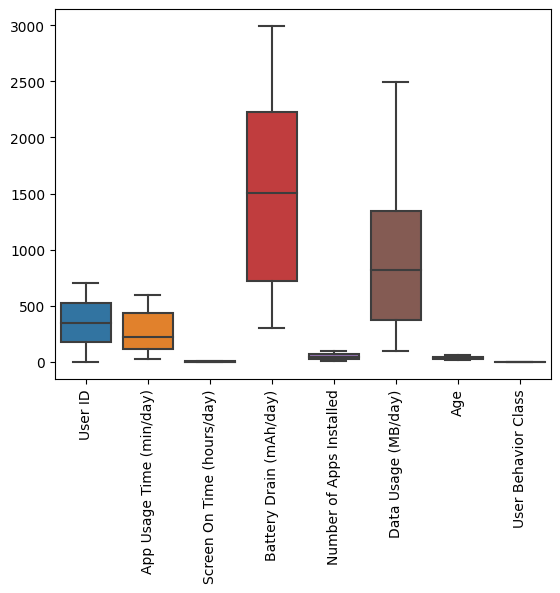

In [5]:
sns.boxplot(df)
plt.xticks(rotation = 90)

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'App Usage Time (min/day)'}>,
        <Axes: title={'center': 'Screen On Time (hours/day)'}>],
       [<Axes: title={'center': 'Battery Drain (mAh/day)'}>,
        <Axes: title={'center': 'Number of Apps Installed'}>,
        <Axes: title={'center': 'Data Usage (MB/day)'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'User Behavior Class'}>, <Axes: >]],
      dtype=object)

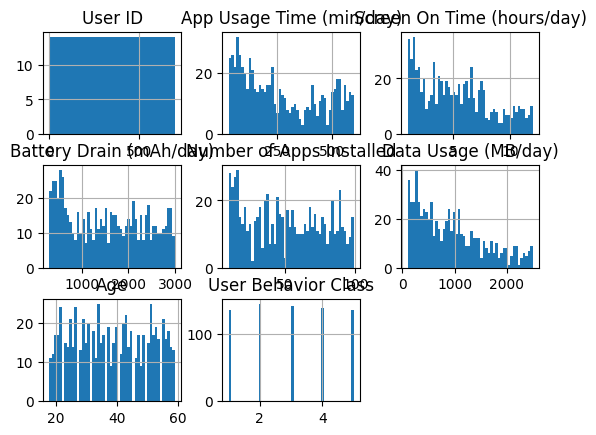

In [7]:
df.hist(bins = 50)

In [8]:
X = df.drop(['User Behavior Class', 'User ID'], axis = 1)
Y = df['User Behavior Class']

In [9]:
catcols = X.select_dtypes(include = ['object']).columns
df[catcols].nunique()

Device Model        5
Operating System    2
Gender              2
dtype: int64

In [10]:
numcols = X.select_dtypes(include = ['int', 'float']).columns
numcols

Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age'],
      dtype='object')

#### Проверка корелляции признаков

<Axes: >

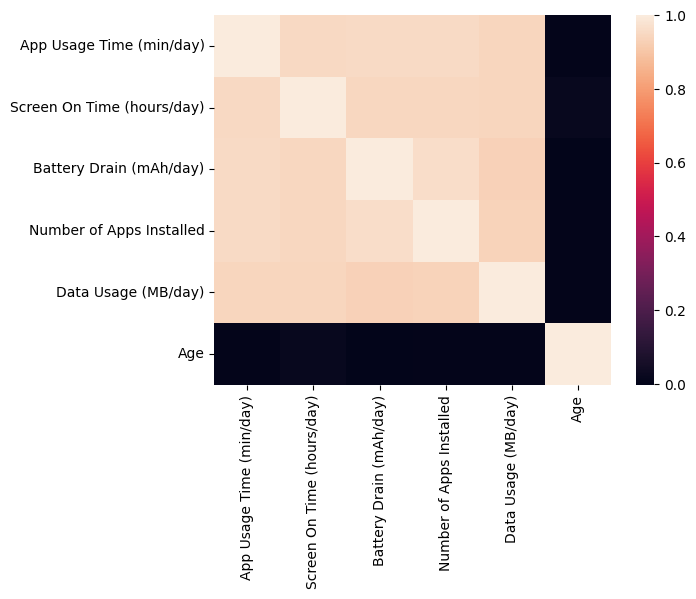

In [11]:
corr_map = X[numcols].corr()
sns.heatmap(corr_map)

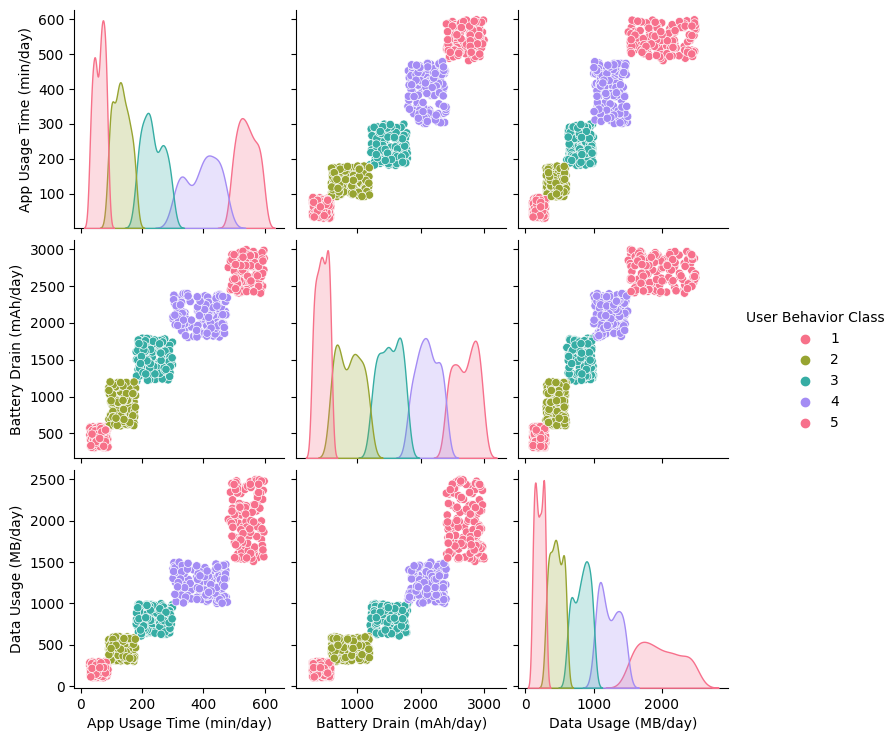

In [34]:
sns.pairplot(df[['App Usage Time (min/day)', 'Battery Drain (mAh/day)',
                   'Data Usage (MB/day)', 'User Behavior Class']], hue='User Behavior Class', palette='husl')

#### Распределение классов по признакам выглядит упорядоченным. Классы можно разбить по прямоугольникам. Модель деревьев должна справиться. Попробуем несколько моделей для сравнения

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [14]:
Y.value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

#### Дизбаланса классов нет, можно использовать accuracy для метрики качества

In [15]:
le =  LabelEncoder()

X = X.drop('Device Model', axis = 1)
X['Gender'] = le.fit_transform(X['Gender'])
X['Operating System'] = le.fit_transform(X['Operating System'])


In [16]:
catcols = X.select_dtypes(include = ['object']).columns

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True)

In [18]:
X_train

,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
605,0,425,6.0,1928,72,1150,53,0
491,1,152,3.7,948,22,507,53,0
539,0,592,9.4,2867,95,1701,27,0
365,0,382,7.2,1965,67,1341,22,1
150,1,523,9.4,2583,92,1539,21,1
...,...,...,...,...,...,...,...,...
265,0,563,8.4,2849,85,1508,25,1
164,0,278,4.8,1238,48,851,43,0
558,0,361,7.6,2037,65,1056,55,1
184,0,597,10.4,2984,91,1564,34,0


In [19]:
m_lr = LogisticRegression(penalty = 'l2')

m_lr.fit(X_train, Y_train)
print(accuracy_score(m_lr.predict(X_test), Y_test))

0.68


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
m_knn = KNeighborsClassifier(n_neighbors = 5)

m_knn.fit(X_train, Y_train)
print(accuracy_score(m_knn.predict(X_test), Y_test))

1.0


In [21]:
m_rf = RandomForestClassifier(n_estimators = 100)

m_rf.fit(X_train, Y_train)
print(accuracy_score(m_rf.predict(X_test), Y_test))

1.0


#### KNN и деревья отлично справились. Можно сделать вывод, что классы в выборке имеют пороговое значение для одновременно нескольких признаков